<a href="https://colab.research.google.com/github/emmayeh-0211/2021AI_dl/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from tensorflow.keras.datasets.mnist import load_data
# x是input的data, y是output的答案
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
# x_train.shape (60000, 28, 28) 60000是第一維的數字、28是第二維的數字、28是第三維的數字 → 總共有6萬筆資料，每筆資料的尺寸是28x28
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


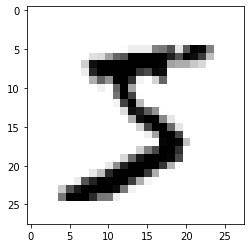

In [3]:
import matplotlib.pyplot as plt
print(y_train[0])
plt.imshow(x_train[0], cmap='gray_r')

In [4]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train[0].shape

(28, 28)

在做深度學習的時候，應該要做幾層？要有幾個神經元？ 沒有固定的方程式來回答，靠經驗 😱

過多參數也會過擬合

儘可能歸納出越少的參數越好

簡單：少
困難：多

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
      # 784哪裡來？ data大小是 28*28=784，input data有784個
      # 784 * 128(線條) + 128(bias) = 100480
      Dense(256, activation='relu', input_dim=784),
      # 128* 10(線條) + 10(bias) = 1290
      Dense(10, activation='softmax')
]     # total params = 100480+1290
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 在預測很差的時候，mse坡度太小，cross entropy坡度較明顯
# 二元(sigmoid): Binary Cross Entropy  p log (1/q) + (1-p) log (1/1-q)
# 多元(softmax): Categorical Cross Entropy  pi(1/qi)
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [8]:
# 資料預處理
# 答案要做one hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# 圖片預處理：[[255. 0, 255, 128]]
# 把原本的 0-255 轉換成 0~1 or -1~1
# 28 x 28 -> 784
x_train_norm = x_train.reshape(60000, 784) / 255
x_test_norm = x_test.reshape(10000, 784) / 255
print(x_train_norm[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# validation_split：切出一些資料來做驗證（0.1:切出一成當驗證資料，所以實際丟下去訓練的資料會是54000筆）
# epochs：看幾輪（10輪：54000 * 10） => 訓練幾輪
# batch_size：看了多少筆在做一次梯度調整(看圖片大小，如果圖片小：代表佔得空間小，可以200再做一次梯度調整；如果圖片大：就看了20筆再做一次梯度調整)
# 200 batch, 10epoch: 54000 * 10 / 200 = 2700次的梯度調整
# verbose：0(無聲) 1(最詳細) 2(沒有進度條)
# patience：如果再訓練了n輪，val_loss都沒有比較好，就會停下來，如果有比較好，就會重新計算n輪
# 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mlp.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train_cat,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)
# val_loss & val_accuracy 代表的是剛剛被切出來的驗證資料，被丟進去模型測試的結果
# 要如何判斷模型是否訓練足夠了？看val => val_loss，accuracy 是正確率，但無法確定正確是真的準確or機率上剛好猜對， loss代表出現正確答案的機率
# 

Epoch 1/100
270/270 - 2s - loss: 0.3696 - accuracy: 0.8983 - val_loss: 0.1662 - val_accuracy: 0.9557
Epoch 2/100
270/270 - 1s - loss: 0.1683 - accuracy: 0.9521 - val_loss: 0.1169 - val_accuracy: 0.9687
Epoch 3/100
270/270 - 1s - loss: 0.1180 - accuracy: 0.9664 - val_loss: 0.0958 - val_accuracy: 0.9733
Epoch 4/100
270/270 - 1s - loss: 0.0904 - accuracy: 0.9744 - val_loss: 0.0852 - val_accuracy: 0.9762
Epoch 5/100
270/270 - 1s - loss: 0.0711 - accuracy: 0.9799 - val_loss: 0.0786 - val_accuracy: 0.9778
Epoch 6/100
270/270 - 1s - loss: 0.0579 - accuracy: 0.9839 - val_loss: 0.0757 - val_accuracy: 0.9792
Epoch 7/100
270/270 - 1s - loss: 0.0470 - accuracy: 0.9868 - val_loss: 0.0774 - val_accuracy: 0.9778
Epoch 8/100
270/270 - 1s - loss: 0.0394 - accuracy: 0.9891 - val_loss: 0.0715 - val_accuracy: 0.9808
Epoch 9/100
270/270 - 1s - loss: 0.0322 - accuracy: 0.9915 - val_loss: 0.0734 - val_accuracy: 0.9803
Epoch 10/100
270/270 - 1s - loss: 0.0268 - accuracy: 0.9937 - val_loss: 0.0723 - val_accura

In [11]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0650 - accuracy: 0.9803


[0.06498287618160248, 0.9803000092506409]